In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import toolkit as tk

%matplotlib inline     

In [2]:
base = "classic"
target = "sputnik"
benchlist = [base,target]

Q1 = list(tk.run_benchmark("VM", benchlist))


in the dir C:\Projects\_GoPkg_\src\github.com\sudachen\playground\branch\classic\benchmarks\benchvm
	executing: go run benchmark.go
in the dir C:\Projects\_GoPkg_\src\github.com\sudachen\playground\branch\sputnik\benchmarks\benchvm
	executing: go run benchmark.go


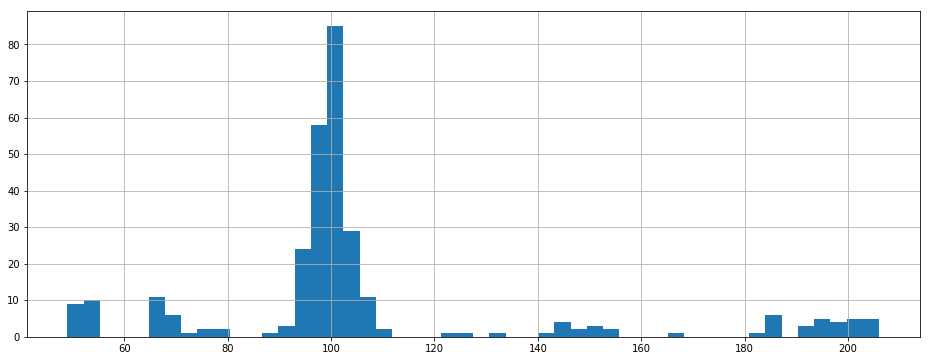

In [5]:
L1 = list(tk.collect(tk.extract(Q1), target, tk.time_percent_of, base))

fig,ax = plt.subplots(figsize=(16,6))
pd.Series([l.active for l in L1 if l.active < 300 and l.active > 30 ]).hist(bins=50)
plt.show()
